# MLP simples com a diferença


- 1 saida - DeltaTheta
- 1 entrada - (Wd - We)
- 1 camada
- 1 neurônio


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

Datasets = []
PREDICTORS = "Wd-We"
TARGET = "Theta"       

for i in range(3):   
    Dataset = pd.read_csv(f"../Dados/Data{i + 1}.csv")
        
    # Ajusta índice pelo tempo
    Dataset.index = (np.arange(0, len(Dataset), 1).astype(float) * 0.07).round(5)
    Dataset[PREDICTORS] = Dataset["Wd"] - Dataset["We"]
    
    Datasets.append(Dataset)

    print(f"++++++++++++++++++++ Dataset {i+1} +++++++++++++++++++++++")
    print(Dataset.head(5))


++++++++++++++++++++ Dataset 1 +++++++++++++++++++++++
        X    Y  Theta    Wd   We  WdRef  WeRef   PwmD   PwmE  Wd-We
0.00  0.0  0.7   0.00  0.00  0.0  -0.00   0.00  -0.00   0.00   0.00
0.07  0.0  0.7   0.00  0.00  0.0   3.02   3.02  -0.00   0.00   0.00
0.14  0.0  0.7   0.00  0.00  0.0   3.02   3.02  45.32  45.32   0.00
0.21  0.0  0.7   0.01  0.36  0.0   3.02   3.02  45.32  45.32   0.36
0.28  0.0  0.7   0.01  0.20  0.0   2.99   3.02  57.60  63.38   0.20
++++++++++++++++++++ Dataset 2 +++++++++++++++++++++++
        X    Y  Theta    Wd   We  WdRef  WeRef   PwmD   PwmE  Wd-We
0.00  0.0  0.7    0.0  0.00  0.0  -0.00   0.00  -0.00   0.00   0.00
0.07  0.0  0.7    0.0  0.00  0.0   3.02   3.02  -0.00   0.00   0.00
0.14  0.0  0.7    0.0  0.00  0.0   3.02   3.02  45.32  45.32   0.00
0.21  0.0  0.7    0.0  0.03  0.0   3.02   3.02  45.32  45.32   0.03
0.28  0.0  0.7    0.0  0.00  0.0   3.02   3.02  63.00  63.44   0.00
++++++++++++++++++++ Dataset 3 +++++++++++++++++++++++
        X    Y  The

In [39]:
for  i in range(3):
    Dataset = Datasets[i].copy()
    Dataset["DeltaTheta"] = Dataset[TARGET].shift(-1) - Dataset[TARGET]
    
    Dataset = Dataset.dropna(subset=["DeltaTheta"])
    Datasets[i] = Dataset
    print(f"++++++++++++++++++++ Dataset {i+1} +++++++++++++++++++++++")
    print(Datasets[i].tail(5))


++++++++++++++++++++ Dataset 1 +++++++++++++++++++++++
          X     Y  Theta    Wd    We  WdRef  WeRef    PwmD    PwmE  Wd-We  \
99.05  0.05  0.65  -0.83 -2.76 -3.35  -2.84  -3.05 -103.15 -117.71   0.59   
99.12  0.05  0.65  -0.83 -2.79 -3.12  -2.86  -3.06 -104.13 -115.63   0.33   
99.19  0.04  0.66  -0.83 -3.29 -3.18  -2.88  -3.06 -104.13 -115.63  -0.11   
99.26  0.04  0.66  -0.83 -3.26 -3.18  -2.86  -3.05  -96.76 -116.39  -0.08   
99.33  0.03  0.67  -0.83 -3.09 -3.01  -2.84  -3.05  -96.76 -116.39  -0.08   

       DeltaTheta  
99.05         0.0  
99.12         0.0  
99.19         0.0  
99.26         0.0  
99.33         0.0  
++++++++++++++++++++ Dataset 2 +++++++++++++++++++++++
          X     Y  Theta    Wd    We  WdRef  WeRef    PwmD    PwmE  Wd-We  \
88.62  0.04  0.65  -0.78 -2.73 -2.65  -2.95  -2.66 -108.21 -110.17  -0.08   
88.69  0.04  0.65  -0.78 -2.54 -2.54  -2.94  -2.65 -108.21 -110.17   0.00   
88.76  0.04  0.65  -0.79 -2.87 -2.59  -2.93  -2.62 -113.11 -112.34  -0.28   

In [42]:
NormDatasets = []
TARGET = ["DeltaTheta"]
PREDICTORS = ["Wd-We"]


SCALER = StandardScaler()
OUT_SCALER = StandardScaler()

TrainDataset = Datasets[0]
TrainDataset[PREDICTORS] = SCALER.fit_transform(TrainDataset[PREDICTORS])
TrainDataset[TARGET] = OUT_SCALER.fit_transform(TrainDataset[TARGET])
NormDatasets.append(TrainDataset)

for i in range(2):
      CurrentTestDataset = Datasets[i + 1]
      CurrentTestDataset[PREDICTORS] = SCALER.transform(CurrentTestDataset[PREDICTORS])
      CurrentTestDataset[TARGET] = OUT_SCALER.transform(CurrentTestDataset[TARGET])
      NormDatasets.append(CurrentTestDataset)
      print(f"++++++++++++++++++++ Dataset Normalizado {i+1} +++++++++++++++++++++++")
      print(NormDatasets[i].head(5))

++++++++++++++++++++ Dataset Normalizado 1 +++++++++++++++++++++++
        X    Y  Theta    Wd   We  WdRef  WeRef   PwmD   PwmE     Wd-We  \
0.00  0.0  0.7   0.00  0.00  0.0  -0.00   0.00  -0.00   0.00  0.035288   
0.07  0.0  0.7   0.00  0.00  0.0   3.02   3.02  -0.00   0.00  0.035288   
0.14  0.0  0.7   0.00  0.00  0.0   3.02   3.02  45.32  45.32  0.035288   
0.21  0.0  0.7   0.01  0.36  0.0   3.02   3.02  45.32  45.32  0.425155   
0.28  0.0  0.7   0.01  0.20  0.0   2.99   3.02  57.60  63.38  0.251881   

      DeltaTheta  
0.00    0.034019  
0.07    0.034019  
0.14    0.616022  
0.21    0.034019  
0.28    0.034019  
++++++++++++++++++++ Dataset Normalizado 2 +++++++++++++++++++++++
        X    Y  Theta    Wd   We  WdRef  WeRef   PwmD   PwmE     Wd-We  \
0.00  0.0  0.7    0.0  0.00  0.0  -0.00   0.00  -0.00   0.00  0.035288   
0.07  0.0  0.7    0.0  0.00  0.0   3.02   3.02  -0.00   0.00  0.035288   
0.14  0.0  0.7    0.0  0.00  0.0   3.02   3.02  45.32  45.32  0.035288   
0.21  0.0  

In [43]:
x_train = np.array(TrainDataset[PREDICTORS])
y_train = np.array(TrainDataset[TARGET])

x_val = np.array((NormDatasets[1])[PREDICTORS])
y_val = np.array((NormDatasets[1])[TARGET])

print(f"Dimensão da entrada: {np.shape(x_train)}")
print(f"Dimensão da saida: {np.shape(y_train)}")

Dimensão da entrada: (1420, 1)
Dimensão da saida: (1420, 1)


In [44]:
import matplotlib.pyplot as plt

def PlotHistory(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title('Training History')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def PlotOut(axs, title, y_true, y_pred):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    time = (np.arange(0, len(y_pred), 1).astype(float) * 0.07).round(5)

    axs.scatter(time, y_true, marker='o', label='Amostras Reais')
    axs.scatter(time, y_pred, marker='x', label='Valores Preditos')
    axs.set_title(f'{title}')
    axs.set_xlabel('Theta')
    axs.set_ylabel('tempo')
    axs.legend()
    axs.grid(True)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

TITLES = ["Training", "Validation", "Test 1", "Test 2"]

def EvalModel(model):
    fig, axs = plt.subplots(4, 1, figsize=(12, 12))
    for i, dataset in enumerate(NormDatasets):
        x = np.array(dataset[PREDICTORS])
        
        # diferenças reais e previstas (já desnormalizadas)
        y_diff = OUT_SCALER.inverse_transform(dataset[TARGET])
        y_pred_diff = OUT_SCALER.inverse_transform(model.predict(x))
        
        # valor inicial de theta no dataset original (não normalizado)
        theta0 = Datasets[i]["Theta"].iloc[0]  
        
        # reconstrução: soma cumulativa
        y_real = theta0 + np.cumsum(y_diff, axis=0)
        y_pred = theta0 + np.cumsum(y_pred_diff, axis=0)
        
        # métricas no espaço de θ
        R2 = r2_score(y_real, y_pred)
        MSE = mean_squared_error(y_real, y_pred)
        print(f"R²_{TITLES[i]} = {R2}")
        print(f"MSE_{TITLES[i]} = {MSE}")
        
        # plota saída
        PlotOut(axs[i], TITLES[i], y_real, y_pred)


In [46]:
from tensorflow import keras
from keras.callbacks import EarlyStopping

INPUT_SIZE = len(PREDICTORS)  

model = keras.models.Sequential([
    keras.layers.Input(shape=(INPUT_SIZE,)),
    keras.layers.Dense(1, activation="linear"),  
])
model.summary()
print(f"Pesos inciais:\n {model.get_weights()}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Pesos inciais:
 [array([[-1.4060516]], dtype=float32), array([0.], dtype=float32)]


Configures the model for training.

In [47]:
model.compile(loss="mean_squared_error", optimizer="adam")

Trains the model for a fixed number of epochs (dataset iterations).

In [48]:
early_stopping_monitor = EarlyStopping(monitor='val_loss',
                                patience=25,
                                restore_best_weights=True)

history = model.fit(x_train, 
                    y_train, 
                    epochs=1000,
                    callbacks=[early_stopping_monitor],
 validation_data=(x_val, y_val))

Epoch 1/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5513 - val_loss: 4.9273
Epoch 2/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9114 - val_loss: 4.7527
Epoch 3/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4334 - val_loss: 4.5867
Epoch 4/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8392 - val_loss: 4.4207
Epoch 5/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3572 - val_loss: 4.2675
Epoch 6/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9978 - val_loss: 4.1121
Epoch 7/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9843 - val_loss: 3.9612
Epoch 8/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0792 - val_loss: 3.8174
Epoch 9/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1990 - val_loss: 3.6738
Epoch 10/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7662 - val_loss: 3.5393
Epoch 11/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8090 - val_loss: 3.4049
Epoch 12/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [49]:
print(f"Pesos finais:\n {model.get_weights()}")

Pesos finais:
 [array([[0.75947386]], dtype=float32), array([-0.00023306], dtype=float32)]


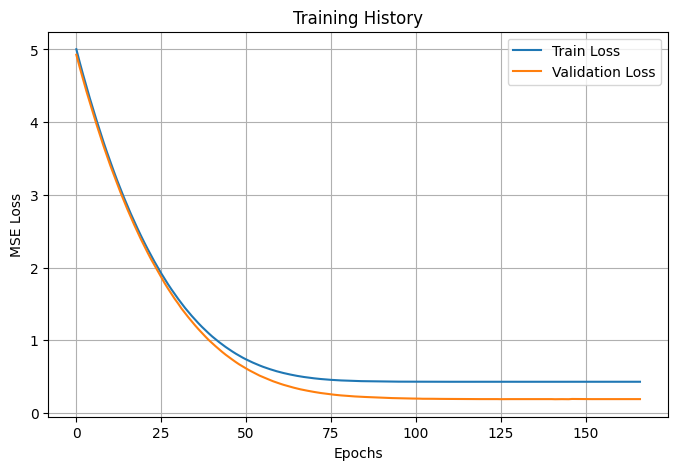

In [50]:
PlotHistory(history)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R²_Training = 0.9006765566994785
MSE_Training = 0.032591990246504644
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R²_Validation = 0.9033752823698156
MSE_Validation = 0.03156237285557151
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R²_Test 1 = 0.9456430359273046
MSE_Test 1 = 0.015499683411038226


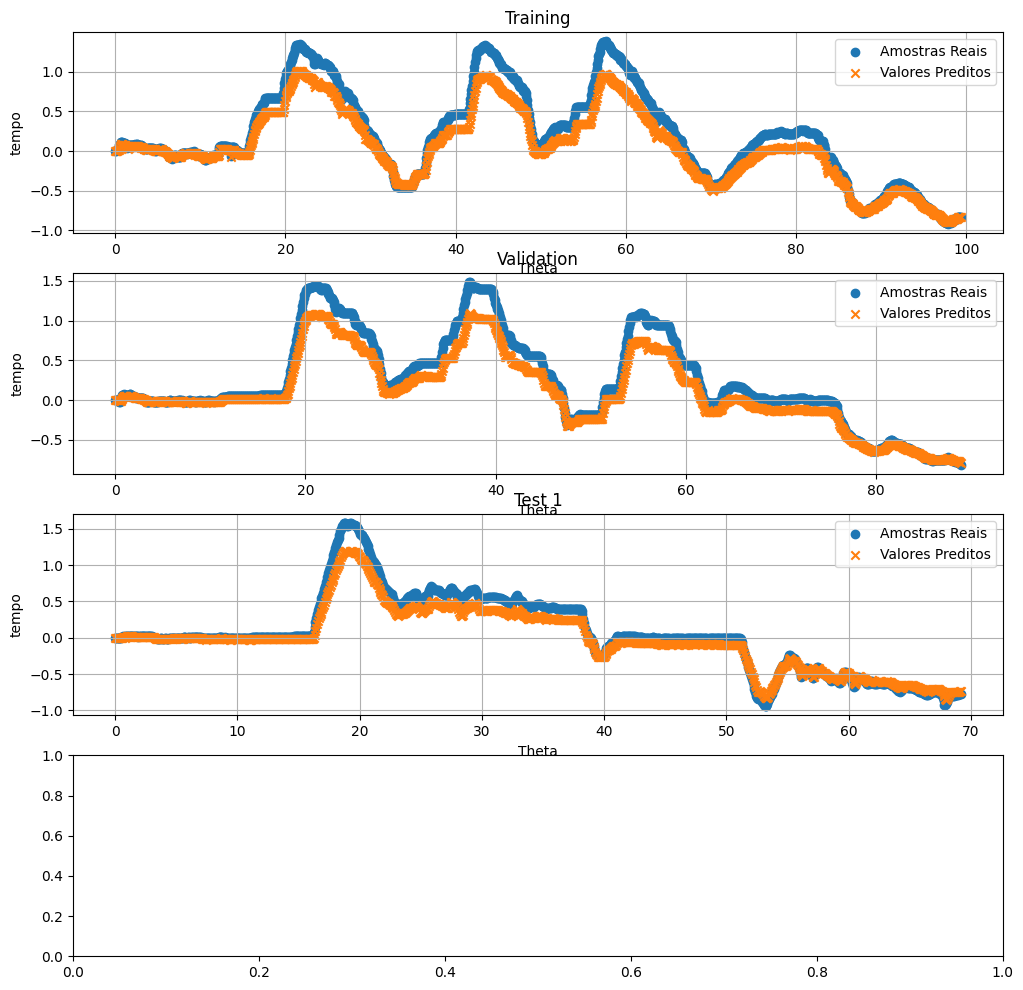

In [51]:
EvalModel(model)